In [1]:
import pandas as pd
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import FreqDist

import re
import string

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("imd_m_web_charm.csv", delimiter = ";")
df.head()
#1596 last of us 
# 1596+wheel = 2374
#=8127

,rates_star,titles,date_comment,who_found_comment_helpful,comments,Movie_title,Genres
0,6/10,Starts very strong and then fades in the stretch,11 October 2023,0 out of 0 found this helpful. Was this review...,"This review is based on Season 1, and I haven'...",Last of us Movie,"Action, Adventure, Drama"
1,7/10,Well made. Skip Episode 3,11 October 2023,1 out of 2 found this helpful. Was this review...,It has been a few years since I played the ori...,Last of us Movie,"Action, Adventure, Drama"
2,5/10,Surely overrated,6 October 2023,2 out of 4 found this helpful. Was this review...,Review of Season One:\n\nScreen adaptations of...,Last of us Movie,"Action, Adventure, Drama"
3,10/10,Would highly recommend this show.,25 September 2023,1 out of 1 found this helpful. Was this review...,I applaud hbo for making video game to TV show...,Last of us Movie,"Action, Adventure, Drama"
4,10/10,Worth watching,23 September 2023,1 out of 1 found this helpful. Was this review...,"It's much better than I expected, the series h...",Last of us Movie,"Action, Adventure, Drama"


### Data Cleaning 
>Created a movie title column Filled Nans with the specific movie name 

>created a genre column and added the movies genres 

>filled nans in comment column as spoilers based on the fact that in the website they are indicated as soilers

In [3]:
#rename column 
#df.rename(columns={"Unnamed: 6" : "Movie_title"}, inplace = True)
# fillna with movie name 
#df['Movie_title'] = df['Movie_title'].fillna('Last of us Movie')
#df['Movie_title'] = df['Movie_title'].fillna('The wheel of Time')
#df['Movie_title'] = df['Movie_title'].fillna('Stranger Things')
#df['Movie_title'] = df['Movie_title'].fillna('The Witcher')
#df['Movie_title'] = df['Movie_title'].fillna('Game of Thrones')
#df['Movie_title'] = df['Movie_title'].fillna('Picky Blinders')
#df['Movie_title'] = df['Movie_title'].fillna('John Wick chapter:4')
#df['Movie_title'] = df['Movie_title'].fillna('The Wolf of Wall Street')
#df['Movie_title'] = df['Movie_title'].fillna('One Piece')
#df['Movie_title'] = df['Movie_title'].fillna('Special Ops:Lioness')
#df['Movie_title'] = df['Movie_title'].fillna('The Lord of the Rings: The Return of the King')

In [4]:
#genre column 
#df.loc[df['Movie_title'] == 'The Lord of the Rings: The Return of the King', 'Genres'] = 'Action, Adventure, Drama'
#df.loc[df['Movie_title'] == 'Special Ops:Lioness', 'Genres'] = 'Action, Drama, Thriller'
#df.loc[df['Movie_title'] == 'One Piece', 'Genres'] = 'Action, Adventure, Comedy'
#df.loc[df['Movie_title'] == 'The Wolf of Wall Street', 'Genres'] = 'Biography, Comedy, Crime'
#df.loc[df['Movie_title'] == 'John Wick chapter:4', 'Genres'] = 'Action, Crime, Thriller'
#df.loc[df['Movie_title'] == 'Picky Blinders', 'Genres'] = 'Crime, Drama'
#df.loc[df['Movie_title'] == 'Game of Thrones', 'Genres'] = 'Action, Adventure, Drama'
#df.loc[df['Movie_title'] == 'The Witcher', 'Genres'] = 'Action, Adventure, Drama'
#df.loc[df['Movie_title'] == 'Stranger Things', 'Genres'] = 'Drama, Fantasy, Horror'
#df.loc[df['Movie_title'] == 'The wheel of Time', 'Genres'] = 'Action, Adventure, Drama'
#df.loc[df['Movie_title'] == 'Last of us Movie', 'Genres'] = 'Action, Adventure, Drama'
#df.drop('user_name', axis=1,inplace = True)

In [5]:
#clean empty column 
#we will fill with spoiler because the heading is already giving hints 
#df['comments'] = df['comments'].fillna('Spoilers ')

In [6]:
# save Clean Dataframe 
#df.to_csv("imd_m_web_charm.csv", index=False, sep=";")


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26836 entries, 0 to 26835
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   rates_star                 26836 non-null  object
 1   titles                     26836 non-null  object
 2   date_comment               26836 non-null  object
 3   who_found_comment_helpful  26836 non-null  object
 4   comments                   26836 non-null  object
 5   Movie_title                26836 non-null  object
 6   Genres                     26836 non-null  object
dtypes: object(7)
memory usage: 1.4+ MB


#The comments are the core of your analysis. Perform sentiment analysis, topic modeling, and content summarization based on these reviews.

### Text Preprocessing 

In [ ]:
# split the dataset 


In [8]:
#lower the comments cases 
df['comments'] = df['comments'].str.lower()

In [9]:
#confirm 
df['comments'][2]

"review of season one:\n\nscreen adaptations of video games are always hit and miss, but when i heard all the rave reviews about this one i started believing the hype. i shouldn't have done. on watching the last of us i felt like i was experiencing yet another run-of-the-mill, generic, hackneyed post-apocalyptic show just like the walking dead, in which all of the interesting apocalypse stuff is hurried over in the first episode and everything gets increasingly cliched from there. season one has only nine episodes and yet two are dull bottle fillers, while the leads are unlikeable, particularly ramsey's bratty character. when the action hits it's pretty good, but the rest just didn't work too well for me."

In [10]:
# removing the html tags
#remove html tags 
def rem_tags(com_nt):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', com_nt)

df['comments'] = df['comments'].apply(rem_tags)

In [11]:
#remove newline tags \n
def remove_newline(sym_l):
    let_sym = re.compile(r'\n')
    clean_text = let_sym.sub(r'',sym_l)
    return clean_text
df['comments'] = df['comments'].apply(remove_newline)

In [12]:
#remove Punctuations example", @,!,. etc"
# puctuations !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
# Define a translation table to remove punctuation
translator = str.maketrans('', '', string.punctuation)

# Remove punctuation from the 'comments' column
df['comments'] = df['comments'].apply(lambda x: x.translate(translator))


In [13]:
df['comments'][3]

'i applaud hbo for making video game to tv show adaptation the game itself was perfect but hbo made a series that can actually hold its own berricks it was really something different that actually made a original story that explore areas where the game never did the direction of the film actually differs from the game but i wont spoil the show the actors were phenomenal but im looking forward to season 2 and what the writers can do that differs from the video game even so this is a show that rather you have played the video game or not the story line that amyone can easily adapt too this is a series that is must watch and highly enjoyable'

In [14]:
#Tokenize 
def word_toke(d_f, text):
    d_f[text] = d_f[text].apply(lambda x: word_tokenize(x))
    return d_f
df = word_toke(df, 'comments')

This are the most commont words:  [('the', 193579), ('and', 95251), ('of', 84241), ('to', 72818), ('a', 72367), ('is', 60866), ('i', 54755), ('it', 49356), ('in', 42800), ('this', 40075)]


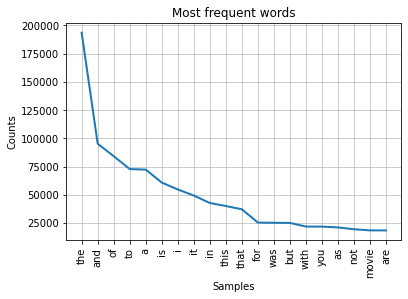

In [15]:
#frequent word 
fdist = FreqDist()
#count 
for word_tk in df['comments']:
    for word in word_tk:
        fdist[word.lower()] +=1
#fist 10 
print('This are the most commont words: ',fdist.most_common(10))
#plot 
fdist.plot(20, title= "Most frequent words")
plt.show()

In [16]:
# Observation we need to get rid of this Stopwords like the which is leading with highest count 

In [17]:
#remove stopwords 
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    new_text = [word for word in text if word not in stop_words]
    return " ".join(new_text)

df['comments'] = df['comments'].apply(remove_stopwords)

This are the most commont words:  [(' ', 1605477), ('e', 1270924), ('i', 739212), ('t', 731215), ('s', 721243), ('a', 702906), ('o', 674590), ('n', 667734), ('r', 624526), ('l', 532277)]


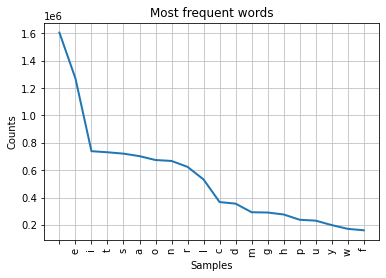

In [23]:
#frequent word 
fdist = FreqDist()
#count 
for word_tk in df['comments']:
    for word in word_tk:
        fdist[word.lower()] +=1
#fist 10 
print('This are the most commont words: ',fdist.most_common(10))
#plot 
fdist.plot(20, title= "Most frequent words")
plt.show()

In [36]:
print('This are the most commont words: ',fdist.most_common())


This are the most commont words:  [(' ', 1605477), ('e', 1270924), ('i', 739212), ('t', 731215), ('s', 721243), ('a', 702906), ('o', 674590), ('n', 667734), ('r', 624526), ('l', 532277), ('c', 367419), ('d', 355777), ('m', 293026), ('g', 290942), ('h', 276694), ('p', 238019), ('u', 231523), ('y', 199179), ('w', 171729), ('f', 161162), ('v', 148318), ('b', 132275), ('k', 111065), ('x', 28066), ('j', 21404), ('1', 12658), ('0', 12372), ('z', 11454), ('q', 9576), ('2', 7032), ('3', 4790), ('8', 3667), ('5', 3085), ('4', 2916), ('9', 2587), ('7', 2150), ('6', 1818), ('é', 265), ('–', 229), ('´', 124), ('—', 105), ('😍', 92), ('å', 57), ('\x96', 57), ('ñ', 54), ('👍', 48), ('🔥', 47), ('❤', 33), ('👏', 31), ('🏻', 29), ('😂', 29), ('👌', 28), ('😊', 23), ('á', 21), ('¨', 21), ('😭', 18), ('½', 17), ('⭐', 16), ('\x91', 16), ('🙏', 15), ('ó', 14), ('😉', 14), ('í', 14), ('\x97', 14), ('ö', 13), ('💯', 13), ('💔', 13), ('😅', 12), ('😁', 12), ('🌟', 12), ('ü', 12), ('🏾', 10), ('à', 9), ('ä', 9), ('🙌', 9), ('🏼